In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

count = 10000

P = [
    [0.13, 0.04, 0.19],
    [0.08, 0.15, 0.07],
    [0.11, 0.11, 0.12]]

sum_by_x = []
x = 0
for i in range(len(P[0])):
    for j in range(len(P)):
        x += P[j][i]
    sum_by_x.append(x)
print(sum_by_x)


sum_by_y = []
y = 0
for j in range(len(P)):
    for i in range(len(P[0])):
        y += P[j][i]
    sum_by_y.append(y)
print(sum_by_y)


def get_x_index(value):
    for i in range(len(sum_by_x)):
        if value < sum_by_x[i]:
            return i


def get_y_index_by_x(value, x_index):
    y = 0
    for i in range(len(P)):
        y += P[i][x_index]
        if value < y:
            return i
    print("ERROR: value = ", value)

[0.32, 0.62, 1.0]
[0.36, 0.6599999999999999, 0.9999999999999999]


In [3]:
rand_x = np.random.randint(0, 999, count) / 1000
rand_y = np.random.randint(0, 999, count) / 1000
result = [
    [0, 0, 0],
    [0, 0, 0],
    [0, 0, 0]]
xs = []
ys = []
for i in range(count):
    x_index = get_x_index(rand_x[i])
    xs.append(x_index)
    sum_one_line = 0
    for j in range(len(P)):
        sum_one_line += P[j][x_index]
    y_variant = rand_y[i] * sum_one_line
    y_index = get_y_index_by_x(y_variant, x_index)
    ys.append(y_index)
    result[y_index][x_index] += 1
    # x_index и y_index are x and y probability indices

Heatmaps are similar considering 10000 scale, which is equal to numbers count


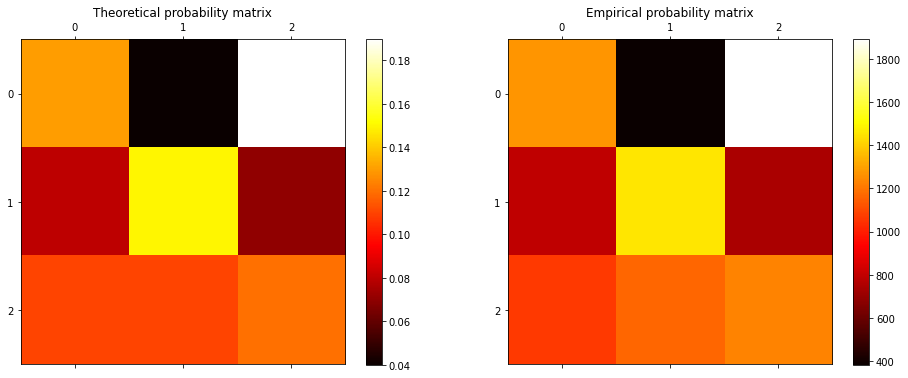

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.set_title('Theoretical probability matrix')
im1 = ax1.matshow(P, cmap='hot', interpolation='nearest')

ax2.set_title('Empirical probability matrix')
im2 = ax2.matshow(result, cmap='hot', interpolation='nearest')

fig.colorbar(im1, ax=ax1)
fig.colorbar(im2, ax=ax2)
print("Heatmaps are similar considering 10000 scale, which is equal to numbers count")

X and Y random value components histograms


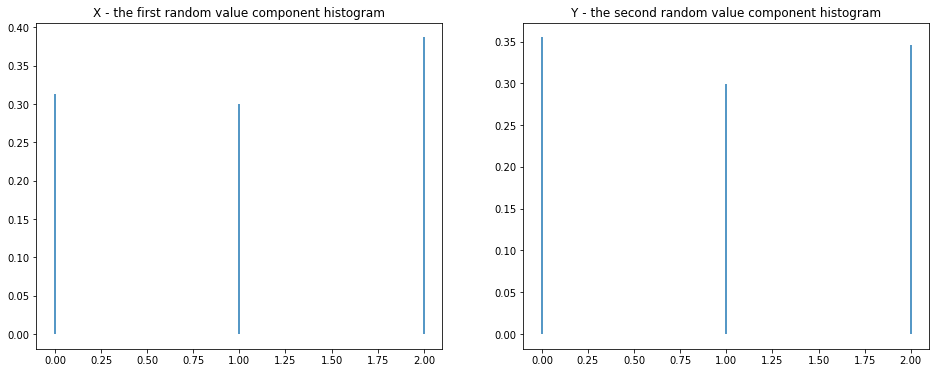

In [5]:
x_unique_values, x_unique_counts = np.unique(xs, return_counts=True)
y_unique_values, y_unique_counts = np.unique(ys, return_counts=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.set_title('X - the first random value component histogram')
ax1.vlines(x_unique_values, 0, x_unique_counts / count)

ax2.set_title('Y - the second random value component histogram')
ax2.vlines(y_unique_values, 0, y_unique_counts / count)
print("X and Y random value components histograms")

In [6]:
row_sums = np.sum(P, axis=1)
column_sums = np.sum(P, axis=0)
theor_variance = np.sum(row_sums), np.sum(column_sums)
print(theor_variance)

emp_variance = np.mean(xs), np.mean(ys)
print(emp_variance)

(0.9999999999999999, 1.0)
(1.0737, 0.9908)


In [14]:
def get_e_x_y(matrix, delimiter = 1):
    return np.sum(np.sum(matrix, axis=0) * [0, 1, 2]) / delimiter, \
           np.sum(np.sum(matrix, axis=1) * [0, 1, 2]) / delimiter

theoretical_e_x, theoretical_e_y = get_e_x_y(P)
print("E[X] of theoretical P:", theoretical_e_x)
print("E[Y] of theoretical P:", theoretical_e_y)

empirical_e_x, empirical_e_y = get_e_x_y(result, count)
print("E[X] of empirical:", empirical_e_x)
print("E[Y] of empirical:", empirical_e_y)
print("Mathematical theoretical and empirical expectations are similar considering 10000 scale, which is equal to numbers count")

E[X] of theoretical P: 1.06
E[Y] of theoretical P: 0.98
E[X] of empirical: 1.0737
E[Y] of empirical: 0.9908
Mathematical theoretical and empirical expectations are similar considering 10000 scale, which is equal to numbers count
